In [459]:
# Titanic data analysis and wragling
# Titanic data analysis main Purpose of this analysis is to figure out who was survived and is there any corelation or causation between survival and non survival
# Important Question and its answers 
# 1) Is there any reason behind survial and dead person variant ratio as male:female?
# 2) Why adult male died more then female and children?
# 3) Is there any corelation between Pclass and survival?
# 4) Age,Sex and Pclass multidimentional Analysis give any new insight?
# 5) Is there any statistical analysis to improve survival ratio?


# Import libraby to analyse data
import pandas as pd 
import numpy as np
import random as rnd
import seaborn as sns


#data visualization
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline


In [460]:
# Train data set used for analysis from Titanic dataset of Train, Test and Gender data sets
# load data for analysis and wargling
train_dt = pd.read_csv('/Users/shruti/Documents/Data Analyst - Udasity/titanic data analysis/train.csv')

In [461]:
# display sample of data from 891 records of train data
#original train data set display to check data before start analysis 
display(train_dt.head(10))
train_dt.describe()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [462]:
# Wargling data to find NaN values in Age and replace it 
# warngle data to replace any NaN value in age because as we can see Age NaN value reduce 
#total count to 714 which is not right for our findings.
# Lets replace NaN in age with Median of age

# train_dt['Age'] = train_dt.Age.replace with median(age) to get more close age guessing for NaN age data 
def human_type(passenger):
    age, sex = passenger

    if age <16:
        return 'child'
    else:
        return sex

train_dt['Age'].fillna(train_dt['Age'].median(), inplace=True)

In [463]:
# Now we can see Age is non contain any NaN value and now we can analyse data 
train_dt.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [464]:
#all over survival rate
display('overall survival rate:', train_dt['Survived'].mean())

'overall survival rate:'

0.3838383838383838

In [465]:
# Distribution of data as per gender in total data set of 891
print(train_dt.Sex.value_counts(dropna=False))

male      577
female    314
Name: Sex, dtype: int64


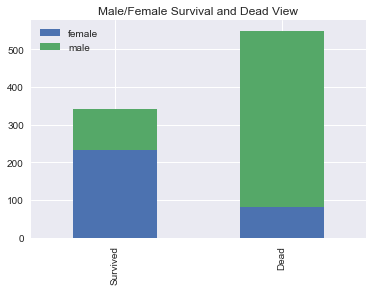

In [466]:
# 1) Is there any reason behind survial and dead person variant ratio as male:female?
# Survival ratio based on gender 
# male dead more as compare to female 

survived_sex = train_dt[train_dt['Survived']==1]['Sex'].value_counts()
dead_sex = train_dt[train_dt['Survived']==0]['Sex'].value_counts()
train_df = pd.DataFrame([survived_sex,dead_sex])
train_df.index = ['Survived','Dead']
train_df.plot(kind='bar', stacked = True)
plt.title('Male/Female Survival and Dead View')

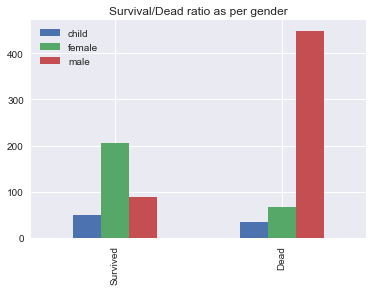

In [467]:
# 2) Why adult male died more then female and children?
# lets group age and gender to do more multidimentional analysis of data    
train_dt['person'] = train_dt[['Age', 'Sex']].apply(human_type, axis =1)

# Survival ratio of Male female and child as per age and gender group by analysis 

# As male might try to survive female, child 1st then male and to rescue adult male worked and might be they not able to survive them
#themself during rescue of female and child
survived_sex = train_dt[train_dt['Survived']==1]['person'].value_counts()
dead_sex = train_dt[train_dt['Survived']==0]['person'].value_counts()
train_df = pd.DataFrame([survived_sex,dead_sex])
train_df.index = ['Survived','Dead']
train_df.plot(kind='bar')
plt.title('Survival/Dead ratio as per gender')

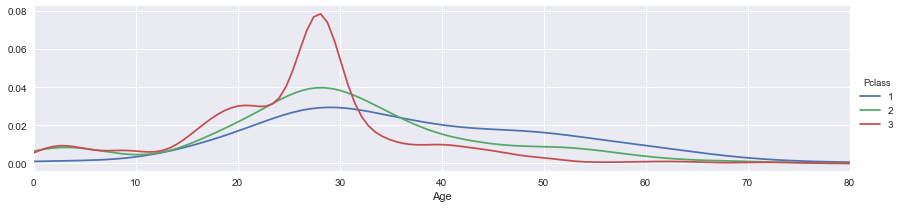

In [468]:
# 3) Is there any corelation between Pclass and survival?
# Passenger Age and Pclass distribution of passenger in different visualization
# from below grid in class 3 there is max adult male as compare to other classes
new_fig = sns.FacetGrid(train_dt,hue='Pclass',aspect=4)
new_fig.map(sns.kdeplot,'Age')
oldest = train_dt['Age'].max()
new_fig.set(xlim=(0,oldest))
new_fig.add_legend()

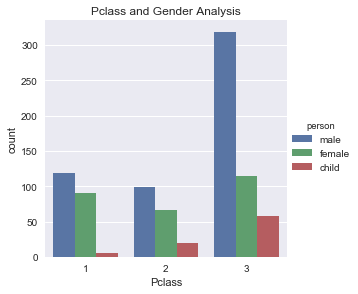

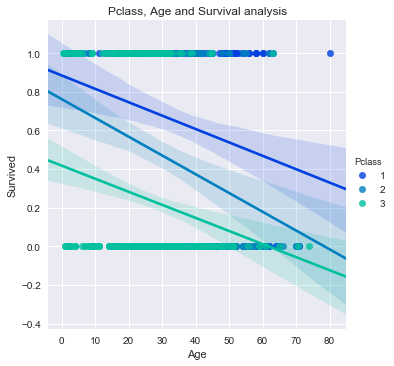

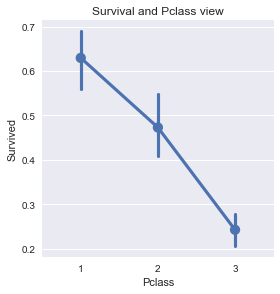

In [469]:
# 4) Age,Sex and Pclass multidimentional Analysis give any new insight?
# all over Passenger class wise survival analysis
# survival as per class and Sex & age ratio analysis
# 1) As per class, Age and Sex, survival very less in class 3 as compare to other classes where we can see more male adult was in that 
# in class 3 as compare to other classes so now because of Pclass at the time of accident people gone be in diffenrent places and 
#from class 3 area it gone be hard to reach to survival place.
# 2) While quantity is also variant in class 3 so survival ratio gone be different
# 3) from this analysis we can not come to any conclusion like due to which reason survival is that much less in class 3

sns.factorplot('Pclass', data=train_dt,kind='count', hue='person')
plt.title('Pclass and Gender Analysis')
sns.lmplot('Age','Survived', hue='Pclass', data=train_dt, palette='winter', hue_order=range(1,4))
plt.title('Pclass, Age and Survival analysis')
sns.factorplot('Pclass','Survived',data=train_dt)
plt.title('Survival and Pclass view')

In [470]:
# cabin data wrangle as NaN data need taken care for cabin wise analysis 
cabin_deck = train_dt['Cabin'].dropna()

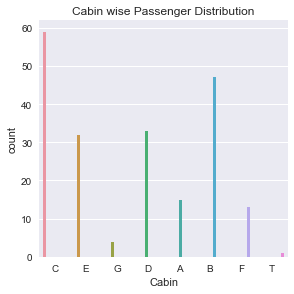

In [471]:
cabin_types = []
for cabin_type in cabin_deck:
    cabin_types.append(cabin_type[0])
cabin_dt = pd.DataFrame(cabin_types)
cabin_dt.columns = ['Cabin']
sns.factorplot('Cabin',data=cabin_dt,kind='count',hue='Cabin')
plt.title('Cabin wise Passenger Distribution')

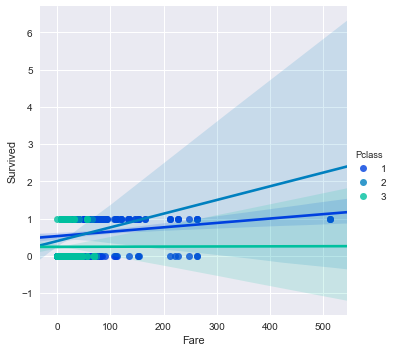

In [472]:
# also fare wise distribution is also clarify that class 3 is cheaper fare and survival is less in class 3 which clarify that
# cheaper class passenger less survived as compare to other which might be they give priority to 
# 1st and 2nd class before 3rd class passenger
sns.lmplot('Fare','Survived', hue='Pclass', data=train_dt, palette='winter', hue_order=range(1,4))

In [473]:
# Conclusion:::::

# survival of passenger as per class and Sex & age analysis and above visualization its clarify that 
# More adult male died because they try to rescue more female and child 1st then male adult and during this male adult died 
# Male adult was more in class 3 so class 1 and class2 passenger rescued 1st as compare to 3rd class passenger might be as per fare priority taken into consideration
# If as per class passenger physically in where exact place and how long it will take for them to reach to rescue place is also important and 
# we do not have detail about class wise passender exact place at the time of accident
# also quantity of passenger was higher in class 3 so to rescue them all took longer as well by the time people died more 
# from this analysis we can not come to any conclusion like due to which reason survival is that much less in class 3 as compare to other classes or why adult male died more than child and female 
# we can consider as social ethics people try to rescue female and child and old people before male adult  
